# Zadanie 1

Przypomnij sobie z wykładu, w jaki sposób możemy łączyć klasyfikatory ze sobą (kilka architektur) oraz co jest niezbędne (jakie warunki muszą być spełnione) do tego, żeby takie połączenia działały skuteczniej od ich elementów składowych.

Nawiązując do informacji z wykładu przeczytaj dokumentację pakietu scikit-learn na temat metod zespołowych w klasyfikacji (pomiń regresję; skup się tylko na BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier i StackingClassifier).

Pobierz zbiór danych o nazwie odpowiadającej Twojemu numerowi albumu i przeprowadź jego wstępną eksplorację: proporcja klas, liczba i rodzaje atrybutów, ich zakresy i rozkłady wartości. Pokaż rozkłady wartości wszystkich atrybutów obok siebie na jednym szerokim wykresie pudełkowym lub skrzypcowym; na osi poziomej umieść nazwy atrybutów. Opisując wnioski (wystarczy kilka zdań) możesz pogrupować (o ile to możliwe) atrybuty pisząc np. "73 atrybuty są takie a takie, 22 atrybuty charakteryzują się tym a tym, wyjątkowy jest atrybut taki a taki", itp.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('151813-ensembles.txt', sep='\t')
X = df.drop(columns='class')
y = df['class']
df

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat68,stat69,stat70,stat71,stat72,stat73,stat74,stat75,stat76,class
0,0.007923,0.35293,0.37823,0.31581,0.17479,0.17897,0.149400,0.127010,0.126490,0.074943,...,0.432870,0.447290,0.34448,0.44225,0.187310,0.189190,0.109530,0.205610,1.5711,1
1,0.009185,0.34112,0.16746,0.29915,0.17171,0.23002,0.209050,0.139820,0.159540,0.148390,...,0.276940,0.226100,0.28106,0.26129,0.073848,0.024835,0.060638,0.053512,1.8886,1
2,0.009370,0.42066,0.18375,0.32303,0.20002,0.22327,0.223610,0.159880,0.156430,0.145530,...,0.271530,0.275190,0.17569,0.25920,0.061151,0.029147,0.012673,0.047963,1.9090,1
3,0.009151,0.42441,0.20184,0.34625,0.21530,0.22798,0.217000,0.169850,0.150030,0.148220,...,0.260210,0.289920,0.17480,0.27165,0.055994,0.054235,0.012931,0.062927,1.8797,1
4,0.009908,0.41407,0.33758,0.27110,0.35049,0.18713,0.196940,0.193610,0.117460,0.115990,...,0.169190,0.272700,0.27267,0.26967,0.009201,0.035756,0.056797,0.056379,1.8355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.015053,0.22438,0.42773,0.44600,0.15844,0.33996,0.400190,0.408340,0.451940,0.514330,...,0.142080,-0.043951,0.11474,0.23480,-0.008345,-0.041602,-0.006015,0.012947,1.8565,0
9996,0.014801,0.23670,0.43010,0.44330,0.15268,0.33915,0.397230,0.398420,0.441000,0.497970,...,0.028616,-0.022236,0.27361,0.19303,-0.031819,-0.049314,0.050277,-0.003542,1.9477,0
9997,0.013841,0.21975,0.40674,0.42200,0.24163,0.31138,0.400700,0.391110,0.446550,0.510830,...,0.042900,0.428560,0.29295,0.21111,-0.025914,0.163710,0.047391,0.007321,1.9172,1
9998,0.006895,0.46699,0.40036,0.33525,0.19791,0.16765,0.096838,0.079296,0.083545,0.065476,...,0.493770,0.327960,0.33402,0.41383,0.209440,0.086006,0.072832,0.155690,1.4007,1


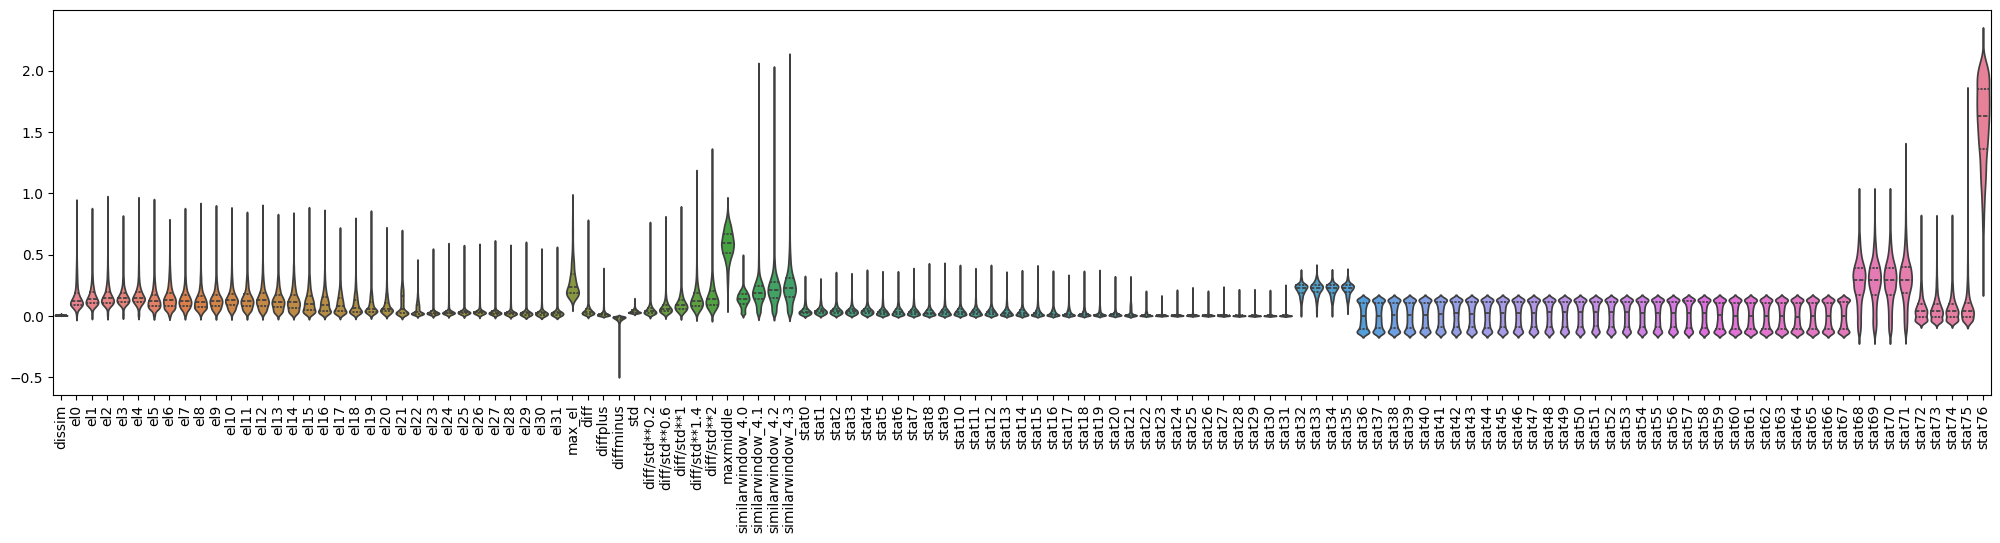

In [3]:
plt.subplots(figsize=(25, 5))
sns.violinplot(data=X, inner="quartile")
plt.xticks(rotation=90)
plt.show()

Zbiór danych zawiera 125 atrybutów o wartościach liczbowych. Atrybuty el0 – el31 oraz max_el przyjmują wartości z przedziału [0, 1], przy czym zdecydowana większość wartości skupia się blisko zera. Szczególnie wyraźnie widać to w przypadku el22 – el31. Atrybuty el0 – el21 mają nieco wyższe wartości, oscylujące wokół 0.1. Podobnie atrybuty stat0 – stat31 zawierają się w zakresie [0, 0.5], jednak większość ich wartości również znajduje się bardzo blisko zera. W przypadku stat32 – stat35 zakres wartości także mieści się w przedziale [0, 0.5], ale wartości zerowe nie występują, a najczęściej pojawiają się wartości około 0.25. Atrybuty stat36 – stat67 mają wartości rozłożone bardziej równomiernie w przedziale [-0.25, 0.25], z rozkładem symetrycznym względem zera i większą liczbą obserwacji na krańcach przedziału. Atrybuty stat68 – stat71 przyjmują wartości z przedziału [-0.25, 1.25], najczęściej około 0.4, a obserwacje przy wartościach skrajnych są rzadsze. Wartości atrybutów stat72 – stat75 w większości mieszczą się w zakresie [-0.2, 0.2], z nielicznymi wartościami odstającymi powyżej tej granicy. Atrybut stat76 cechuje się równomiernym rozkładem wartości w przedziale od 1.0 do 2.25, z jednym przypadkiem odstającym poniżej 0.75. Atrybuty diff/std oraz similarwindow mają większość wartości w zakresie [0, 0.5], z obserwacjami odstającymi powyżej tej wartości. Wyjątkowy jest atrybut dissim, którego wartości są bardzo blisko zera i praktycznie nie wykazują rozrzutu. Z kolei diffminus to jedyny atrybut przyjmujący wyłącznie wartości ujemne. Ogólnie większość atrybutów charakteryzuje się bardzo wąskim zakresem, w którym skupia się większość wartości, oraz obecnością wartości odstających poza tym zakresem.

# Zadanie 2

Stosując wiedzę nabytą na wcześniejszym laboratorium z transformacji przestrzeni atrybutów, zwizualizuj ten zbiór w 2D i 3D podając procent wariancji zachowany przy rzutowaniu oryginalnej przestrzeni do 2D i 3D. Na wykresach pokaż przypadki obu klas jako kropki o dwóch różnych kolorach. Rozwiąż ewentualny problem zasłaniania kropek, na czym może cierpieć mniej liczna klasa. Czy na podstawie tej wizualizacji możesz dostrzec pole do współpracy różnych klasyfikatorów – czy pewne fragmenty przestrzeni wydają się trudne dla jednych metod, a proste dla innych? Czy ten rodzaj wizualizacji uprawnia do wyciągania tego typu wniosków?

In [4]:
from sklearn.decomposition import PCA

Zachowana wariancja w 2D: 0.4154


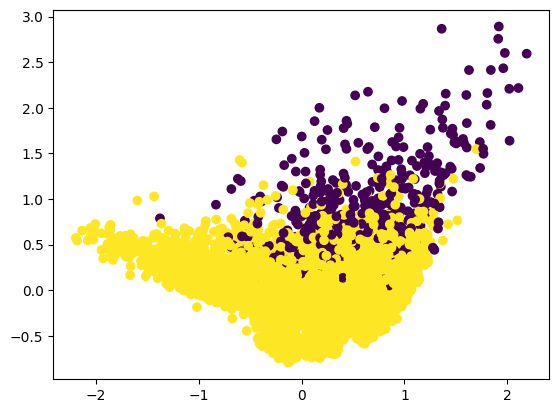

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(f"Zachowana wariancja w 2D: {np.sum(pca.explained_variance_ratio_):.4f}")
plt.scatter(*X_pca.T, c=y)

Zachowana wariancja w 3D: 0.4894


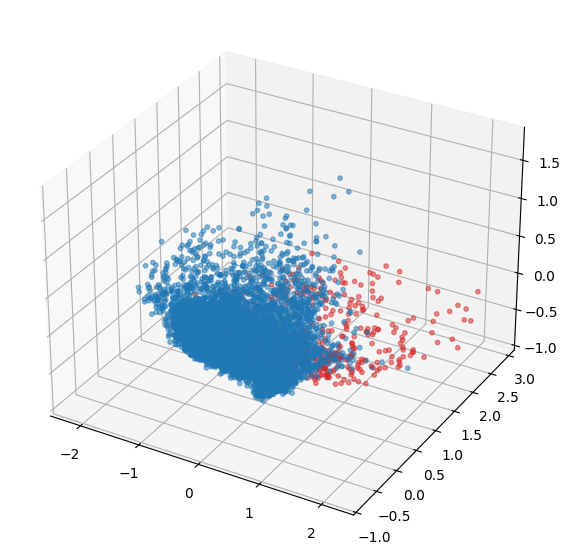

In [6]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)
print(f"Zachowana wariancja w 3D: {np.sum(pca_3d.explained_variance_ratio_):.4f}")
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['tab:red' if label == 0 else 'tab:blue' for label in y]

ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=colors, alpha=0.5, s=10)
plt.show()


W celu transformacji przestrzeni atrybutów zastosowano algorytm PCA. Rzutowanie oryginalnej przestrzeni na 2D pozwoliło zachować 42,93% wariancji danych, natomiast rzutowanie na 3D – 49,93%.

Na podstawie wizualizacji można zauważyć pewne obszary, gdzie klasy są lepiej odseparowane, co może sugerować, że różne klasyfikatory mogą mieć różną skuteczność w różnych fragmentach przestrzeni. Jednakże należy podkreślić, że rzutowanie do 2D i 3D zachowuje mniej niż 50% wariancji danych, co oznacza, że większość struktury oryginalnych danych zostaje utracona. W związku z tym wyciąganie wniosków na temat działania klasyfikatorów wyłącznie na podstawie tej wizualizacji może być mylące.

# Zadanie 3

Przejrzyj dokumentację RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier. Które z nich mają parametr n_estimators? Czym on się różni od parametru estimators oraz estimator/base_estimator? Pamiętaj o różnorodnych, poznanych do tej pory klasyfikatorach – DecisionTreeClassifier, SVC, MLPClassifier, GaussianNB i QuadraticDiscriminantAnalysis.

Parametr `n_estimators` mają **RandomForestClassifier** i **AdaBoostClassifier** – określa on liczbę klasyfikatorów budowanych przez model. **VotingClassifier** i **StackingClassifier** nie posiadają `n_estimators`, ponieważ nie tworzą modeli samodzielnie, tylko agregują te podane w parametrze `estimators`.

**AdaBoostClassifier** dodatkowo posiada parametr `estimator` (dawniej `base_estimator`), który definiuje model bazowy, domyślnie `DecisionTreeClassifier(max_depth=1)`.

**StackingClassifier** ma parametr `final_estimator`, który uczy się na wynikach bazowych klasyfikatorów.

Poznane klasyfikatory (np. `DecisionTreeClassifier`, `SVC`, `MLPClassifier`, `GaussianNB`, `QuadraticDiscriminantAnalysis`) nie mają `n_estimators`, ale mogą być użyte jako klasyfikatory bazowe.

# Zadanie 4

Postaraj się uzyskać na swoim zbiorze danych jak najwyższą trafność klasyfikacji za pomocą czterech wymienionych w poprzednim punkcie metod zespołowych. Używaj oryginalnych (niezmienionych) atrybutów. W przypadku AdaBoost, Voting i Stacking poeksperymentuj z różnymi zestawami bazowych klasyfikatorów (przynajmniej dwie próby na jedną architekturę) – to może być iteracyjna praca, polegająca na odkrywaniu, które klasyfikatory nawzajem sobie pomagają podnosząc jakość klasyfikacji. Tę jakość oceniaj za pomocą G-mean techniką 10-fold stratified CV. Przy średniej z CV zawsze podawaj/pokazuj jej odchylenie standardowe. Opisz przeprowadzone próby i wyciągnij wnioski.

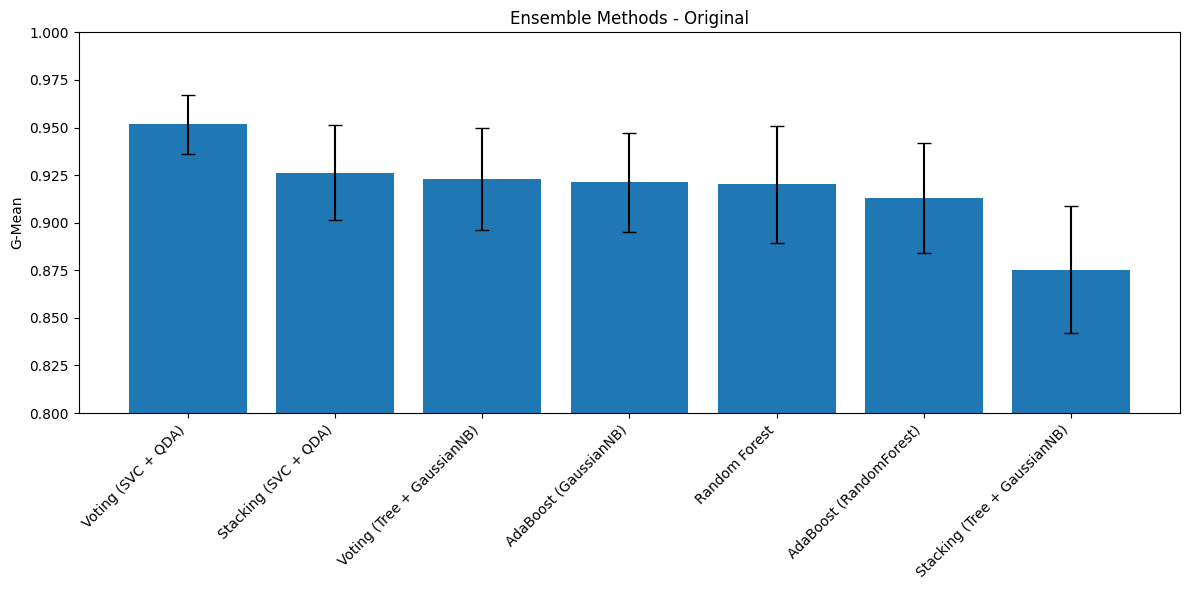

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import geometric_mean_score

classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost (GaussianNB)': AdaBoostClassifier(estimator=GaussianNB(), n_estimators=50, random_state=42),
    'AdaBoost (RandomForest)': AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=10, random_state=42), n_estimators=50, random_state=42),
    'Voting (Tree + GaussianNB)': VotingClassifier(estimators=[
        ('tree', DecisionTreeClassifier(random_state=42)),
        ('gnb', GaussianNB())
    ], voting='soft', n_jobs=-1),
    'Stacking (Tree + GaussianNB)': StackingClassifier(estimators=[
        ('tree', DecisionTreeClassifier(random_state=42)),
        ('gnb', GaussianNB())
    ], final_estimator=LogisticRegression(), cv=5, n_jobs=-1),
    'Voting (SVC + QDA)': VotingClassifier(estimators=[
        ('svc', SVC(probability=True, random_state=42)),
        ('qda', QuadraticDiscriminantAnalysis())
    ], voting='soft', n_jobs=-1),
    'Stacking (SVC + QDA)': StackingClassifier(estimators=[
        ('svc', SVC(probability=True, random_state=42)),
        ('qda', QuadraticDiscriminantAnalysis())
    ], final_estimator=LogisticRegression(), cv=5, n_jobs=-1)
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results_original = []

for name, clf in classifiers.items():
    gmeans = []
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        gmean = geometric_mean_score(y_test, y_pred)
        gmeans.append(gmean)
    results_original.append({
        'Classifier': name,
        'G-Mean Mean': np.mean(gmeans),
        'G-Mean Std': np.std(gmeans)
    })

results_df = pd.DataFrame(results_original)
results_df = results_df.sort_values(by='G-Mean Mean', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(results_df['Classifier'], results_df['G-Mean Mean'], yerr=results_df['G-Mean Std'], capsize=5)
plt.ylim(0.8, 1)
plt.ylabel('G-Mean')
plt.title('Ensemble Methods - Original')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Przetestowano klasyfikatory RandomForest oraz AdaBoost z domyślnymi ustawieniami parametrów. W przypadku metod zespołowych Voting i Stacking zastosowano dwa zestawy klasyfikatorów: pierwszy składający się z DecisionTreeClassifier i GaussianNB, a drugi z SVC oraz QuadraticDiscriminantAnalysis. Dodatkowo przeprowadzono testy klasyfikatora AdaBoost wykorzystującego jako bazowe modele GaussianNB oraz RandomForest zamiast domyślnego drzewa decyzyjnego.

Najwyższą wartość G-mean, wynoszącą około 0,95, uzyskano dla VotingClassifier z zespołem SVC i QDA. Większość metod osiągnęła wyniki na poziomie około 0,925, natomiast najsłabszy wynik, około 0,88, uzyskał StackingClassifier (tree + GaussianNB). Odchylenia standardowe były zbliżone dla wszystkich klasyfikatorów i wynosiły około 0,025.

# Zadanie 5

Powtórz cały poprzedni eksperyment (poszukiwanie najwyższej jakości) jeszcze raz (tym razem bez eksperymentowania z różnymi zestawami bazowych klasyfikatorów), aby porównać wyniki (robiąc np. wykres różnic) wykorzystania oryginalnych atrybutów oraz atrybutów znormalizowanych. Wybierz jedną metodę normalizacji i uzasadnij, dlaczego taką wybrałe/aś. Zwróć uwagę, jak należy podejść do skalowania, kiedy mamy zbiór uczący i testujący, i nie wolno nam "dotykać" zbioru testowego podczas uczenia.

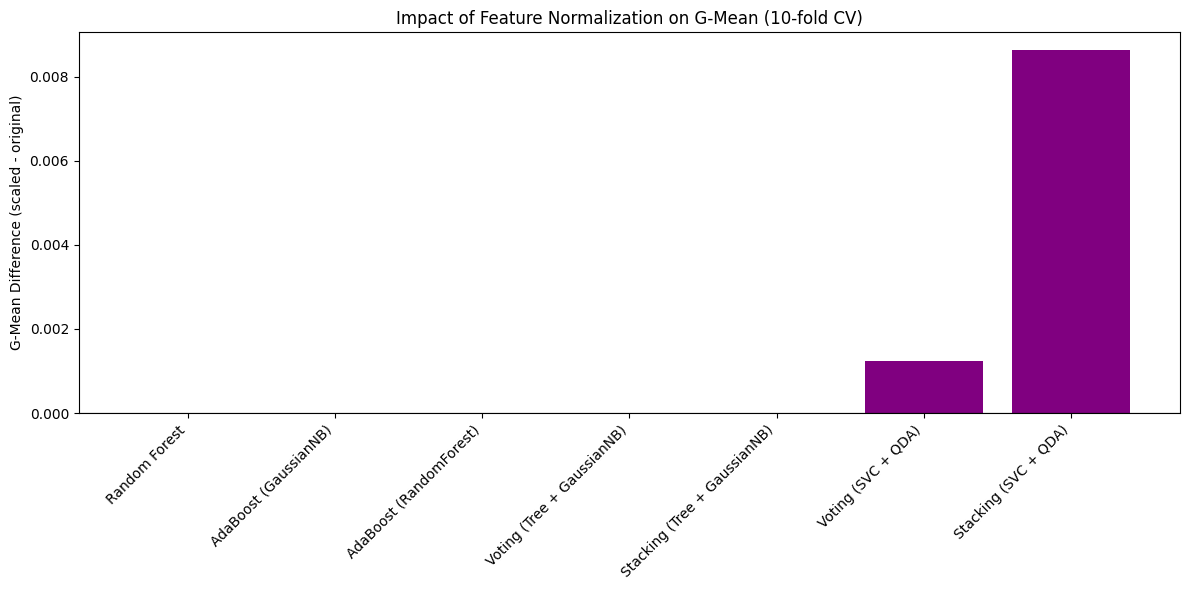

In [8]:
from sklearn.preprocessing import RobustScaler

classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost (GaussianNB)': AdaBoostClassifier(estimator=GaussianNB(), n_estimators=50, random_state=42),
    'AdaBoost (RandomForest)': AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=10, random_state=42), n_estimators=50, random_state=42),
    'Voting (Tree + GaussianNB)': VotingClassifier(estimators=[
        ('tree', DecisionTreeClassifier(random_state=42)),
        ('gnb', GaussianNB())
    ], voting='soft', n_jobs=-1),
    'Stacking (Tree + GaussianNB)': StackingClassifier(estimators=[
        ('tree', DecisionTreeClassifier(random_state=42)),
        ('gnb', GaussianNB())
    ], final_estimator=LogisticRegression(), cv=5, n_jobs=-1),
    'Voting (SVC + QDA)': VotingClassifier(estimators=[
        ('svc', SVC(probability=True, random_state=42)),
        ('qda', QuadraticDiscriminantAnalysis())
    ], voting='soft', n_jobs=-1),
    'Stacking (SVC + QDA)': StackingClassifier(estimators=[
        ('svc', SVC(probability=True, random_state=42)),
        ('qda', QuadraticDiscriminantAnalysis())
    ], final_estimator=LogisticRegression(), cv=5, n_jobs=-1)
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results_scaled = []

for name, clf in classifiers.items():
    gmeans = []
    for train_idx, test_idx in cv.split(X, y):
        X_train_raw, X_test_raw = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train_raw)
        X_test = scaler.transform(X_test_raw)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        gmean = geometric_mean_score(y_test, y_pred)
        gmeans.append(gmean)

    results_scaled.append({
        'Classifier': name,
        'G-Mean Mean': np.mean(gmeans),
        'G-Mean Std': np.std(gmeans)
    })

df_orig = pd.DataFrame(results_original).set_index('Classifier')
df_scaled = pd.DataFrame(results_scaled).set_index('Classifier')

diff = df_scaled['G-Mean Mean'] - df_orig['G-Mean Mean']

plt.figure(figsize=(12, 6))
bars = plt.bar(diff.index, diff, color='purple')
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel('G-Mean Difference (scaled - original)')
plt.title('Impact of Feature Normalization on G-Mean (10-fold CV)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Do normalizacji wybrano metodę `RobustScaler`, ze względu na jej odporność na wartości odstające, które występują w niemal wszystkich atrybutach analizowanego zbioru danych. W odróżnieniu od często wykorzystywanych metod takich jak `StandardScaler` czy `MinMaxScaler`, `RobustScaler` wykorzystuje medianę i rozstęp międzykwartylowy, co pozwala zachować większą stabilność w obecności obserwacji ekstremalnych.

Podczas walidacji krzyżowej normalizacja była przeprowadzana wyłącznie na zbiorze uczącym w każdej iteracji, zgodnie z dobrymi praktykami – zbiór testowy pozostawał niezmodyfikowany na etapie uczenia.

Wpływ zastosowania normalizacji był marginalny. Największa zaobserwowana zmiana wynosiła zaledwie 0,009. Poprawa wyników nastąpiła wyłącznie w przypadku klasyfikatorów zespołowych `VotingClassifier` oraz `StackingClassifier`, zbudowanych z klasyfikatorów `SVC` oraz `QDA`. W pozostałych przypadkach nie wystąpiły żadne różnice w wartościach G-Mean.


# Zadanie 6

Wybierz najbardziej obiecującą złożoną architekturę i spróbuj dostroić jej parametry – zarówno samej architektury, jak i klasyfikatorów bazowych. Możesz się częściowo wspomóc znanym już GridSearchCV. Ponieważ klasy nie są zbalansowane, sprawdź, czy użycie class_weight='balanced' przynosi poprawę. Ile wynosi zysk z dostrojenia parametrów w porównaniu do rozwiązania początkowego?

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best parameters:
{'voting__qda__reg_param': 0.1, 'voting__svc__C': 1, 'voting__svc__class_weight': None, 'voting__svc__gamma': 0.01, 'voting__svc__kernel': 'rbf', 'voting__weights': [1, 1]}
Mean G-Mean: 0.977
Standard deviation: 0.016


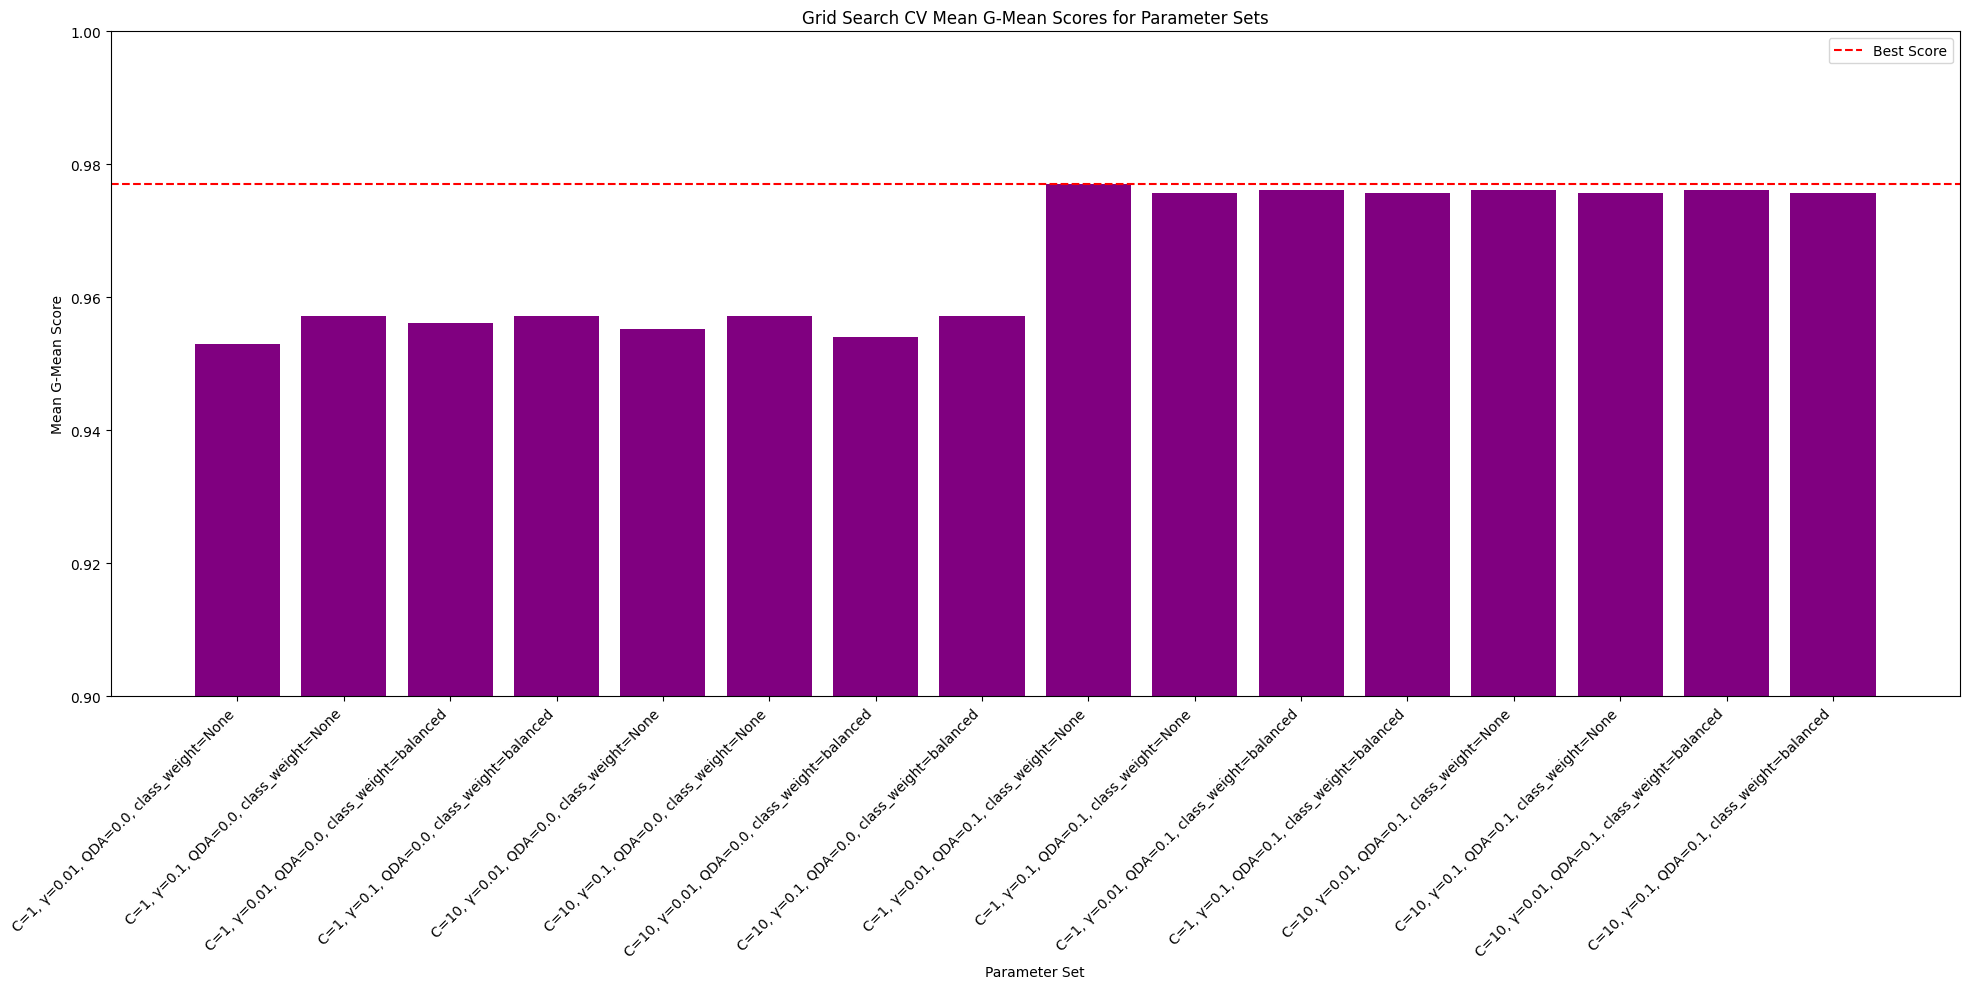

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

gmean_scorer = make_scorer(geometric_mean_score)

svc = SVC(probability=True, random_state=42)
qda = QuadraticDiscriminantAnalysis()

voting_clf = VotingClassifier(
    estimators=[('svc', svc), ('qda', qda)],
    voting='soft',
    n_jobs=-1
)

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('voting', voting_clf)
])

param_grid = {
    'voting__svc__C': [1, 10],
    'voting__svc__gamma': [0.01, 0.1],
    'voting__svc__kernel': ['rbf'],
    'voting__svc__class_weight': [None, 'balanced'],
    'voting__qda__reg_param': [0.0, 0.1],
    'voting__weights': [[1, 1]]
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=gmean_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

print("Best parameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

gmeans = []
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    gmean = geometric_mean_score(y_test, y_pred)
    gmeans.append(gmean)

print(f"Mean G-Mean: {np.mean(gmeans):.3f}")
print(f"Standard deviation: {np.std(gmeans):.3f}")

results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(20, 10))
bars = plt.bar(range(len(results)), results['mean_test_score'], color='purple')
plt.axhline(grid_search.best_score_, color='red', linestyle='--', label='Best Score')
plt.ylabel('Mean G-Mean Score')
plt.xlabel('Parameter Set')
plt.title('Grid Search CV Mean G-Mean Scores for Parameter Sets')

xtick_labels = []
for params in results['params']:
    label = f"C={params['voting__svc__C']}, γ={params['voting__svc__gamma']}, QDA={params['voting__qda__reg_param']}, class_weight={params['voting__svc__class_weight']}"
    xtick_labels.append(label)

plt.xticks(ticks=range(len(results)), labels=xtick_labels, rotation=45, ha='right', fontsize=10)
plt.ylim(0.9, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

Wybrano najbardziej obiecującą złożoną architekturę w postaci zespołu klasyfikatorów (`VotingClassifier`), łączącego `SVC` i `QuadraticDiscriminantAnalysis (QDA)` z głosowaniem miękkim. W ramach strojenia parametrów wykorzystano `GridSearchCV` z 10-krotną walidacją krzyżową. Przetestowano łącznie 16 kombinacji parametrów, co dało 160 dopasowań. Najlepsze parametry to: `{'voting__qda__reg_param': 0.1, 'voting__svc__C': 1, 'voting__svc__class_weight': None, 'voting__svc__gamma': 0.01, 'voting__svc__kernel': 'rbf', 'voting__weights': [1, 1]}`. Dla tego zestawu uzyskano średnią wartość `G-mean` na poziomie `0.977` oraz odchylenie standardowe `0.016`.

W porównaniu do rozwiązania początkowego, które osiągało średni `G-mean` w okolicach `0.95`, dostrojenie parametrów przyniosło zauważalną poprawę skuteczności klasyfikatora. Szczególny wpływ miało obniżenie wartości parametru `C` w `SVC` z `10` do `1`, co zwiększyło `G-mean` do `0.97`. Parametr `C` w modelu `SVC` kontroluje kompromis między maksymalizacją marginesu a minimalizacją błędów klasyfikacji — niższa wartość `C` pozwala modelowi na szerszy margines i większą tolerancję dla błędów, co może poprawić ogólną zdolność generalizacji modelu.

Natomiast ustawienie `class_weight='balanced'` w `SVC` nie przyniosło istotnej poprawy, co wskazuje, że nierównowaga klas została wystarczająco dobrze obsłużona przez inne mechanizmy modelu.

# Zadanie 7

Obejrzyj macierze pomyłek dla najlepszych uzyskanych zespołów klasyfikatorów i podsumuj wnioski: Jaki był wpływ normalizacji? Jakie architektury i ich parametry dały najlepsze G-mean i ile ono wyniosło? Czy widzisz zysk ze współpracy klasyfikatorów (w porównaniu do pojedynczego klasyfikatora) i ich uzupełniające się kompetencje? Jak duże są odchylenia standardowe wartości zwracanych przez 10-fold stratified CV i czy różnice w jakościach porównywanych klasyfikatorów są istotne?

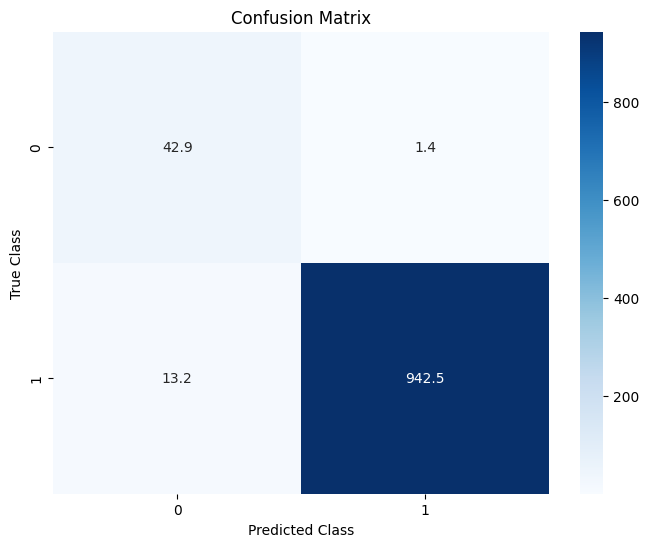

Mean G-Mean: 0.977
Standard Deviation: 0.016


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_params = grid_search.best_params_

svc_best = SVC(
    C=best_params['voting__svc__C'],
    gamma=best_params['voting__svc__gamma'],
    kernel=best_params['voting__svc__kernel'],
    class_weight=best_params['voting__svc__class_weight'],
    probability=True,
    random_state=42
)

qda_best = QuadraticDiscriminantAnalysis(
    reg_param=best_params['voting__qda__reg_param']
)

voting_clf_best = VotingClassifier(
    estimators=[('svc', svc_best), ('qda', qda_best)],
    voting='soft',
    weights=best_params['voting__weights'],
    n_jobs=-1
)

pipeline_best = Pipeline([
    ('scaler', RobustScaler()),
    ('voting', voting_clf_best)
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

conf_matrices = []
gmeans = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    pipeline_best.fit(X_train, y_train)
    y_pred = pipeline_best.predict(X_test)
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    gmeans.append(geometric_mean_score(y_test, y_pred))

mean_conf_matrix = np.mean(conf_matrices, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix, annot=True, fmt='.1f', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

print(f"Mean G-Mean: {np.mean(gmeans):.3f}")
print(f"Standard Deviation: {np.std(gmeans):.3f}")

In [11]:
from sklearn.model_selection import cross_val_score

gmean_scorer = make_scorer(geometric_mean_score)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

svc_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('svc', SVC(C=1, gamma=0.01, kernel='rbf', probability=True, random_state=42))
])
svc_scores = cross_val_score(svc_pipeline, X, y, cv=cv, scoring=gmean_scorer)
print(f"SVC G-mean: {np.mean(svc_scores):.3f} ± {np.std(svc_scores):.3f}")


qda_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('qda', QuadraticDiscriminantAnalysis(reg_param=0.1))
])
qda_scores = cross_val_score(qda_pipeline, X, y, cv=cv, scoring=gmean_scorer)
print(f"QDA G-mean: {np.mean(qda_scores):.3f} ± {np.std(qda_scores):.3f}")

svc = SVC(C=1, gamma=0.01, kernel='rbf', probability=True, random_state=42)
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)

voting_clf = VotingClassifier(
    estimators=[('svc', svc), ('qda', qda)],
    voting='soft',
    weights=[1, 1],
    n_jobs=-1
)

voting_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('voting', voting_clf)
])

voting_scores = cross_val_score(voting_pipeline, X, y, cv=cv, scoring=gmean_scorer)
print(f"VotingClassifier G-mean: {np.mean(voting_scores):.3f} ± {np.std(voting_scores):.3f}")


SVC G-mean: 0.872 ± 0.035
QDA G-mean: 0.975 ± 0.015
VotingClassifier G-mean: 0.977 ± 0.016


Normalizacja w tym eksperymencie miała marginalny wpływ na wynik — uzyskana wartość `G-mean` zmieniła się o nie więcej niż `0.01`, co wskazuje na stosunkowo niewielką rolę przeskalowania danych dla wybranych klasyfikatorów.

Najlepsze wyniki osiągnięto dla zespołu klasyfikatorów (`VotingClassifier`), który łączył `SVC` oraz `QDA`. Zestawienie to, przy dostrojonych parametrach (`C=1`, `gamma=0.01` dla `SVC`, `reg_param=0.1` dla `QDA`, `weights=[1,1]`), osiągnęło średnie `G-mean` na poziomie `0.977`, z odchyleniem standardowym `0.016`.

Model bardzo dobrze rozpoznaje klasę pozytywną (`942.5` poprawnych klasyfikacji), przy minimalnej liczbie fałszywie negatywnych (`13.2`). Klasa negatywna również jest dobrze identyfikowana, z wysoką czułością (`42.9` poprawnych klasyfikacji) i niską liczbą błędnych detekcji (`1.4`). Wskazuje to na zrównoważoną skuteczność klasyfikatora i wysoką ogólną jakość predykcji.

Porównując wyniki pojedynczych klasyfikatorów: `SVC` osiągał `G-mean` na poziomie około `0.872`, a `QDA` około `0.975`. Ich połączenie w architekturze zespołowej przyniosło tylko niewielką poprawę (`0.977`), co sugeruje, że główny wkład pochodzi od `QDA`, a `SVC` pełni raczej rolę wspierającą. Zysk ze współpracy klasyfikatorów istnieje, ale jest stosunkowo nieduży.

Odchylenie standardowe dla najlepszego zespołu wynosiło `0.016`, co wskazuje na stabilność wyników w walidacji krzyżowej. Różnice między lepszymi modelami w ramach eksperymentów były często mniejsze niż to odchylenie, co oznacza, że nie wszystkie różnice były statystycznie istotne. Jednak różnica pomiędzy najlepszym a bazowym modelem była wyraźna i znacząca.
